# Исследовательский анализ исторических данных о продажах игр, оценок пользователей и экспертов, жанров и платформ

Цель исследования: выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

###### Описание данных

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [317]:
data = pd.read_csv('/datasets/games.csv')

In [318]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Подготовка данных

###### Заменим названия столбцов (приведем к нижнему регистру)

In [319]:
data.columns = data.columns.str.lower()

In [320]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [321]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Исходя из полученной информации о данных, можно сказать, что в столбцах: year_of_release и user_score тип данных приведен не в соответствии с правилами.

In [322]:
data['year_of_release'] = data['year_of_release'].astype("Int64") 

In [323]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Заменим во всей таблице значения tbd на nan.

In [324]:
data.replace('tbd', np.nan, inplace=True)

In [325]:
data['user_score'] = data['user_score'].astype(float) 

In [326]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Итак, тип данных заменен в столбцах: year_of_release (float yf int64),так как год не может быть дробным числом, и user_score (object на float), так как оценка должна быть дробным числом аналогично как и в столбце critic_score.

Проверим отрицательные значения 

In [328]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


###### Проверим наличие пропусков

In [329]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [330]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


Пропуски присутствуют в следующих столбцах: name (имя), year_of_release (год выпуска), critic_score (оценка критиков), user_score (оценка пользователей), rating (рейтинг от организации ESRB).

In [331]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Можем наблюдать, что в строках пропущенным значением 'name' также имеются пропуски по остальным столбцам, поэтому пропущенные значения можно удалить, одновременно удаляться 2 пропуска в столбце genre.

In [332]:
data = data.dropna(subset=['name'])

In [333]:
data[data['name'].isna()] # проверяем

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [385]:
data['rating'] = data['rating'].fillna('no_rating') # необходимо для дальнейшего исследования

In [386]:
data['rating'].head(15)

0             E
1     no_rating
2             E
3             E
4     no_rating
5     no_rating
6             E
7             E
8             E
9     no_rating
10    no_rating
11            E
12    no_rating
13            E
14            E
Name: rating, dtype: object

In [335]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,no_rating
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,no_rating
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,no_rating


Возьмем игру с неуказанным годом и проверим, выпускалась ли она на других платформах, таким образом можно попробовать заполнить пропущенные значения в годах за счет наличия в датасете информации об одних и тех же играх, только выпущенных для разных платформ.

In [336]:
data.query('name == "Madden NFL 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [337]:
data.query('name == "FIFA Soccer 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,FIFA Soccer 2004,XB,2003,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,FIFA Soccer 2004,GC,2003,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,FIFA Soccer 2004,GBA,2003,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


In [338]:
data.query('name == "LEGO Batman: The Videogame"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008,Action,1.75,1.01,0.0,0.29,72.0,8.0,E10+
1519,LEGO Batman: The Videogame,PS3,2008,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,<NA>,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


In [339]:
for game in data[data['year_of_release'].isnull() == True].index:
    data['year_of_release'][game] = data.loc[data['name'] == data['name'][game], 'year_of_release'].max()

In [340]:
data['year_of_release'].isna().sum()

146

В столбце year_of_release из 269 осталось 146 пропусков.

In [341]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [342]:
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [343]:
data.query('name == "Super Mario Bros."')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating
201,Super Mario Bros.,GB,1999,Platform,3.40,1.30,0.15,0.22,NaN,NaN,no_rating


Заполнять попуски в critic_score, user_score и rating будет некорректно, так как в дальнейшем исследовании мы можем получить неточные результаты.
Американская компания ESRB основана в 1994 г, поэтому скорее всего столбец rating имеет пропуски до 1994 года.
Отсутсвие значений в столбцах critic_score и user_score скорее всего связано с тем, что оценка игры просто отсутствует.
Также данные за 2016 год представлены не в полном объеме, так как год еще не закончился.

###### Посчитаем суммарные продажи во всех регионах 

In [344]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


Итак, при изучении общей информации файла: /datasets/games.csv., выяснилось, что названия столбцов не приведены к нижнему регистру, в столбцах year_of_release и user_score тип данных приведен не в соответствии с правилами. Также обнаружены пропуски  в следующих столбцах: name (имя), genre, year_of_release (год выпуска), critic_score (оценка критиков), user_score (оценка пользователей), rating (рейтинг от организации ESRB). В ходе обработки данных, наименования столбцов приведены к нижнему регистру, тип данных приведен в соответствие, удалены пропуски в столбцах name и genre, столбец year_of_release заполнен частично, critic_score, user_score, rating оставлены без изменений.


In [ ]:
data['duplicates'] = data.duplicated(keep=False)

In [346]:
data.query('duplicates == "True"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,duplicates


Неполные дубликаты отсутствуют.

## Проведем исследовательский анализ данных

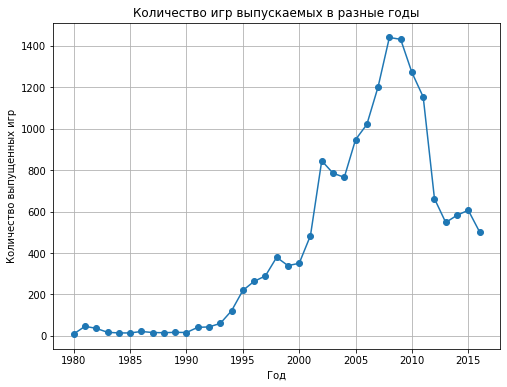

In [347]:
(
data
    .pivot_table(index='year_of_release', values='name', aggfunc=['count'])
    .plot(marker='o', grid=True, figsize=(8, 6), legend=False)
)
plt.title('Количество игр выпускаемых в разные годы')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')
plt.show()


C 1980 по 1990 год навблюдается наименьшее количество выпущенных игр, поэтому все данные за все периоды не важны. С 1991 года начинается рост, пиковые значения приходятся на 2008 - 2009 годы, далее начинается спад по количеству игр.

In [348]:
platform_sales = data.pivot_table(index='platform', values=['total_sales'], aggfunc='sum')/
.sort_values(by='total_sales', ascending=False)
platform_sales.columns=['sum_sales']
platform_sales.head(10)

,sum_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


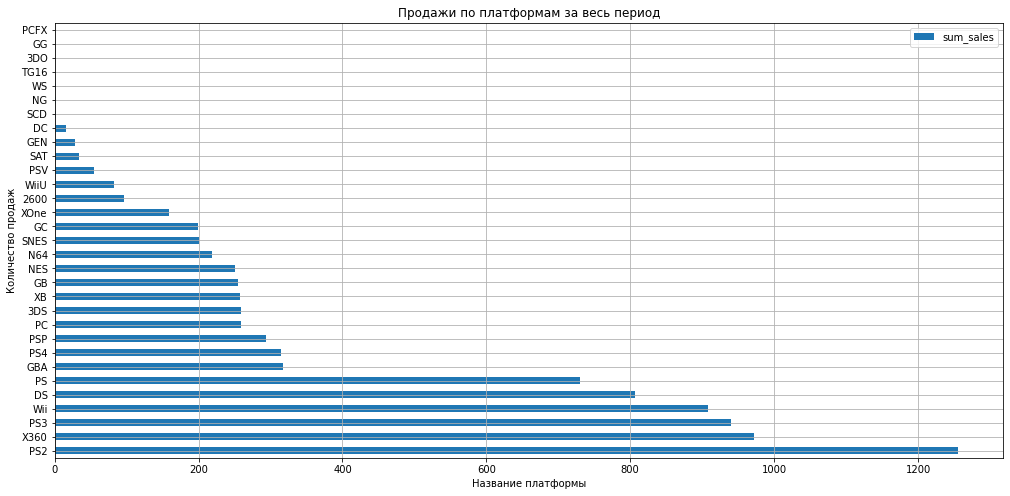

In [349]:
platform_sales.plot(kind='barh', legend=True, grid=True, figsize=(17, 8))
plt.title('Продажи по платформам за весь период')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж')
plt.show()


Из графика видно, что самые популярные игровые платформы за весь период это PS2, X360, PS3, Wii, DS, PS.

###### Построим распределения по годам для каждой платформы

In [350]:
top_platforms = platform_sales.reset_index()

In [351]:
top_platforms2 = top_platforms['platform'].unique()

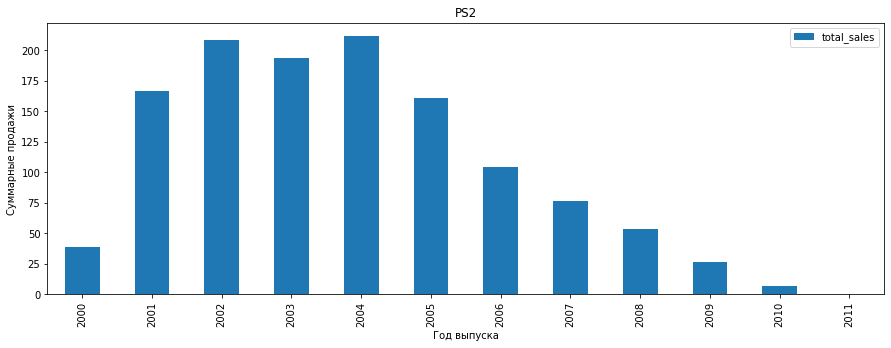

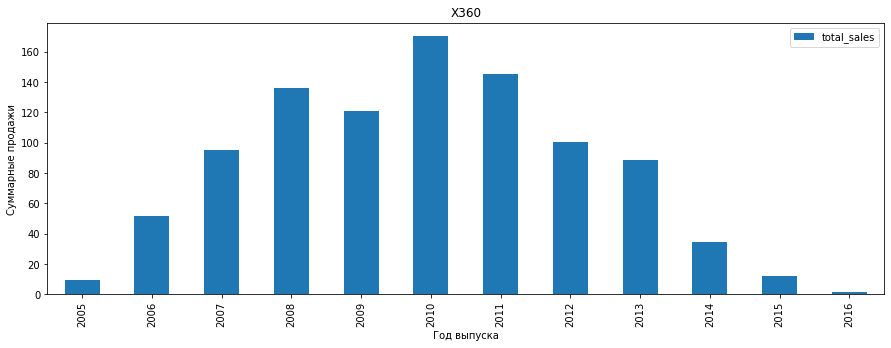

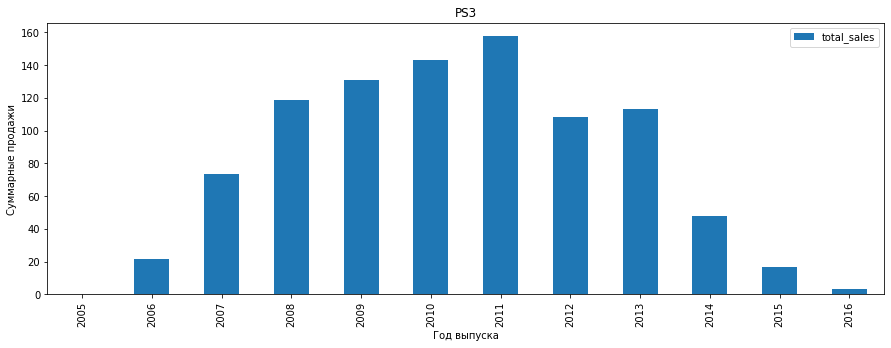

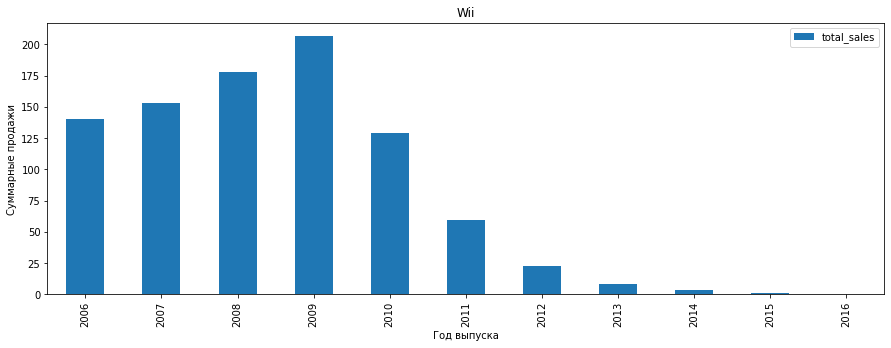

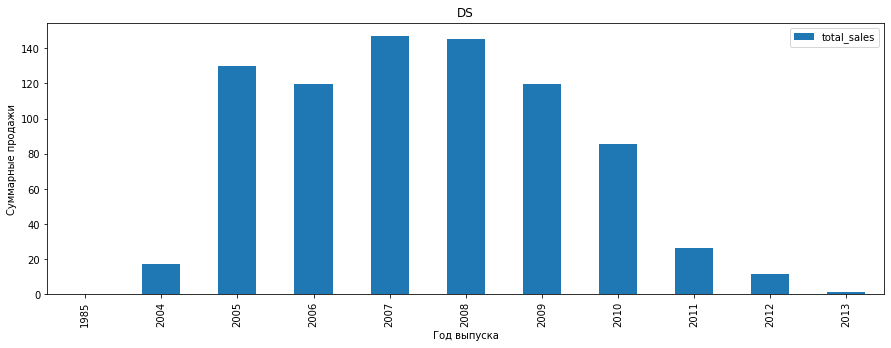

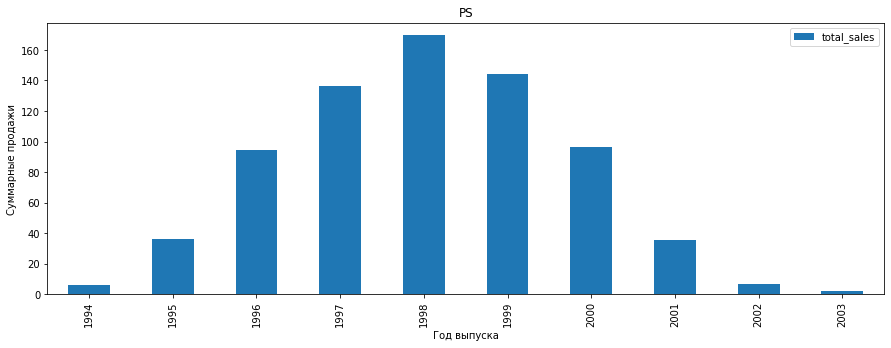

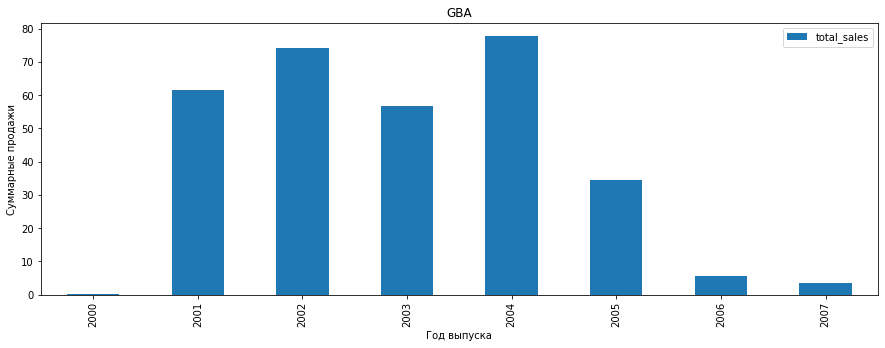

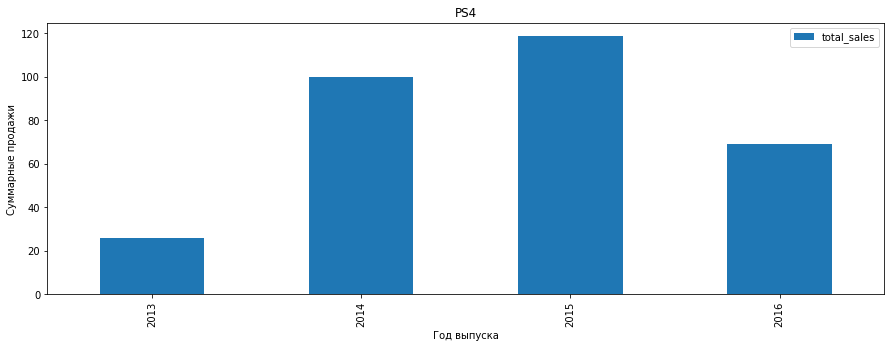

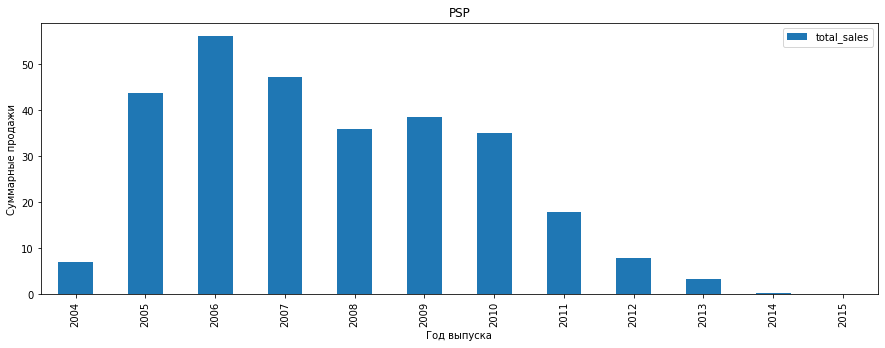

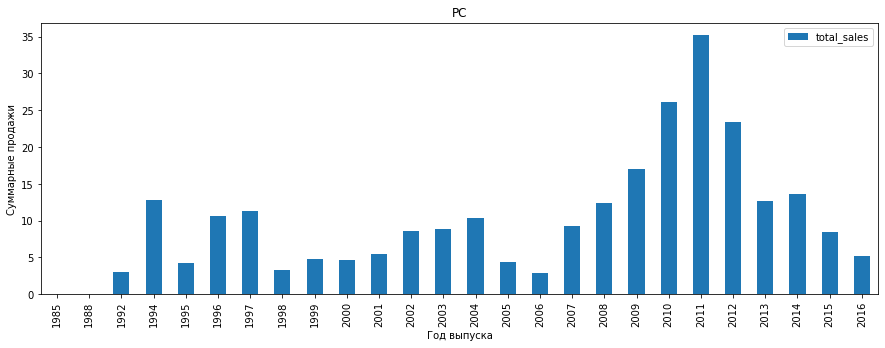

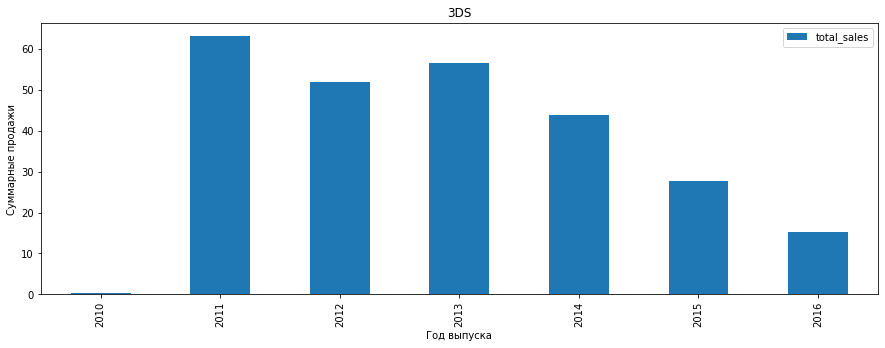

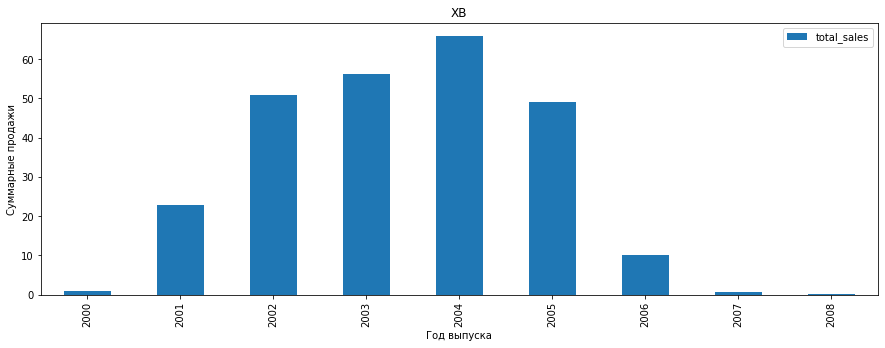

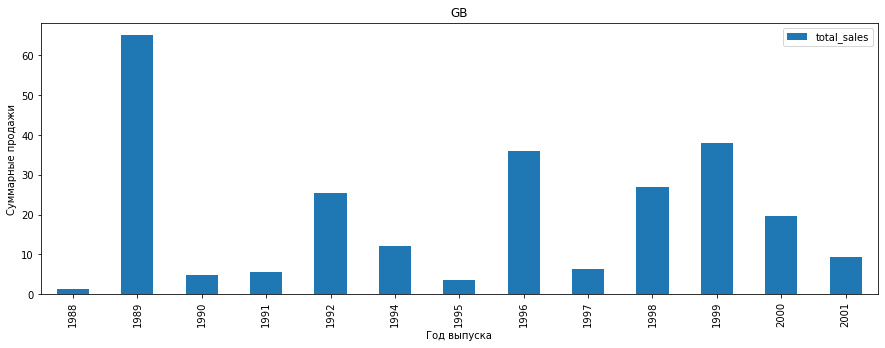

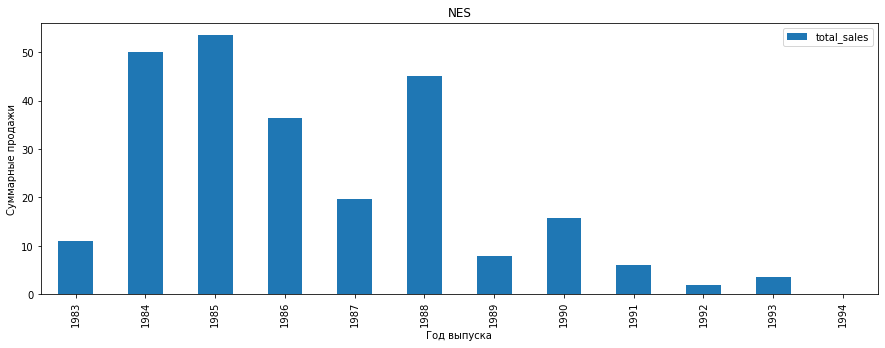

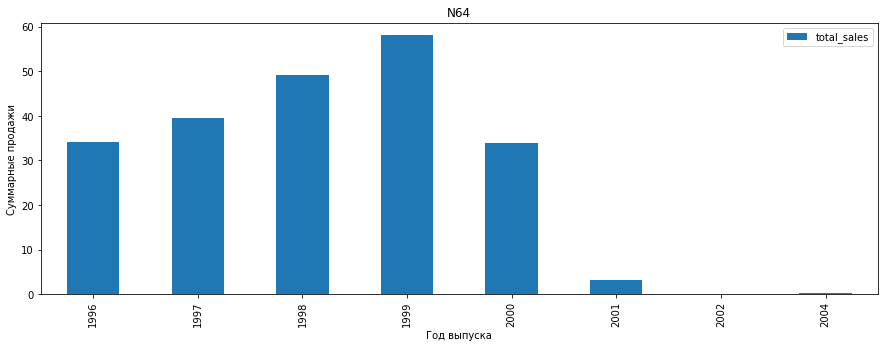

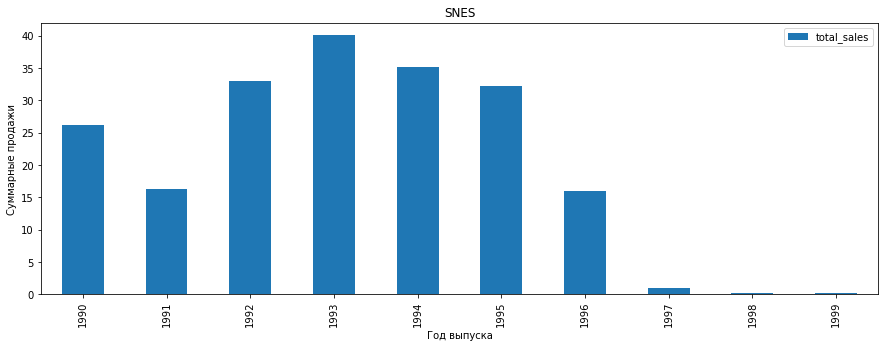

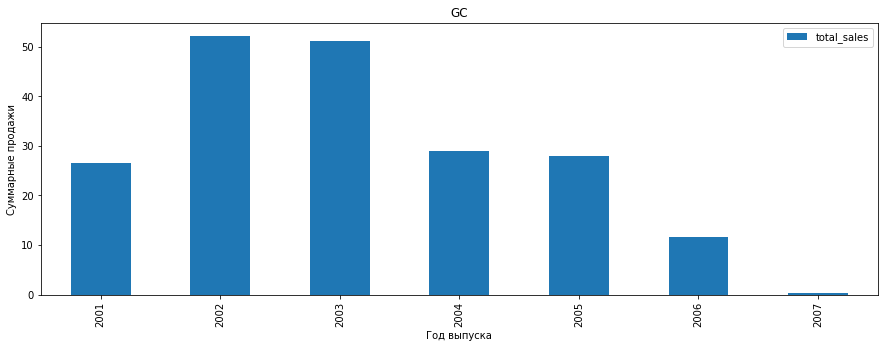

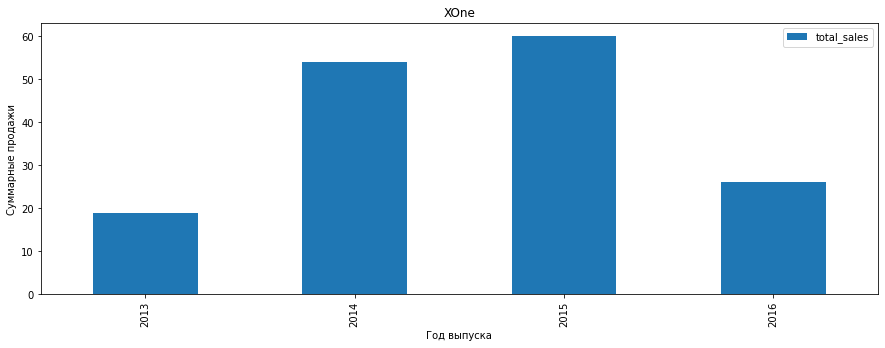

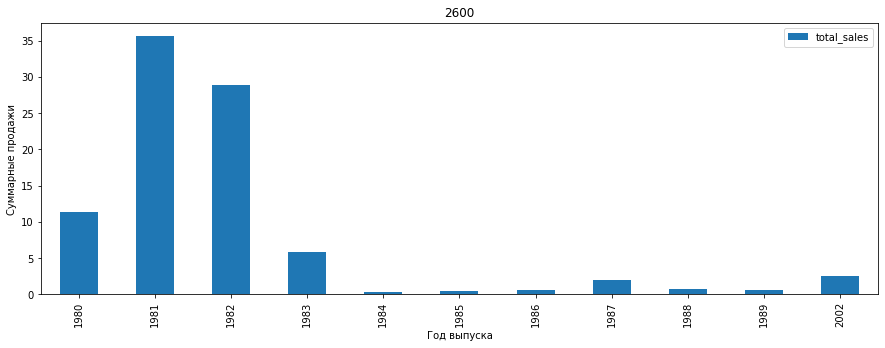

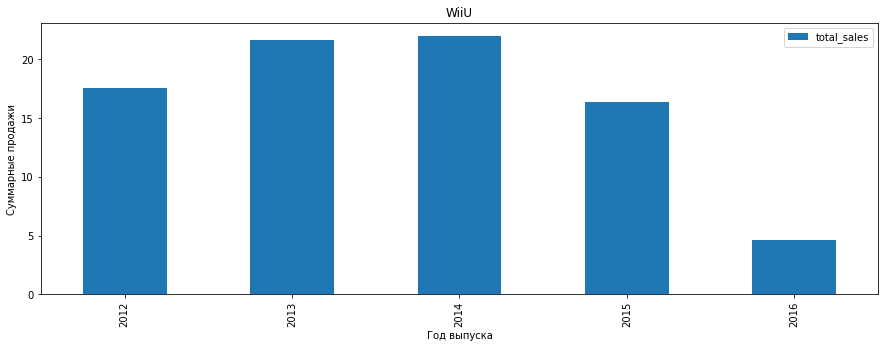

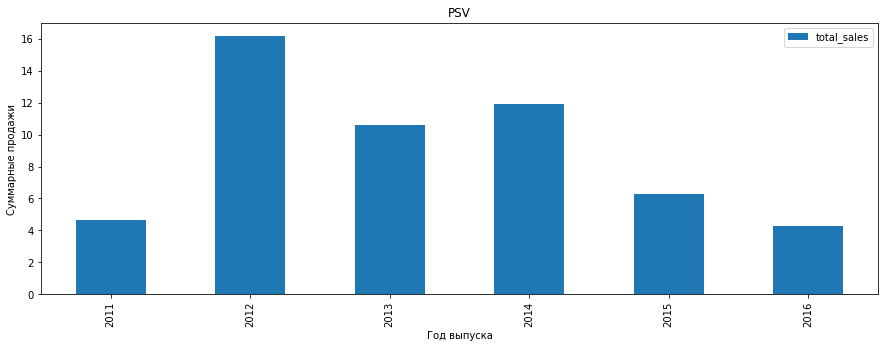

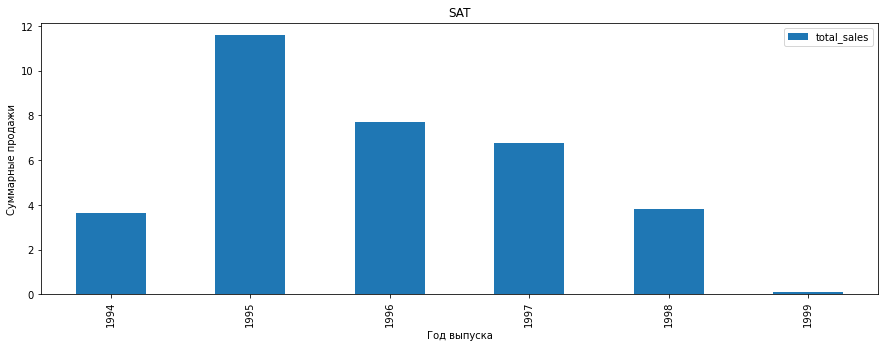

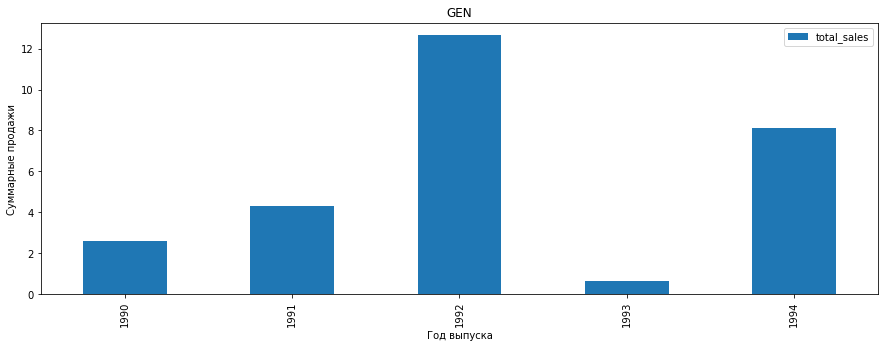

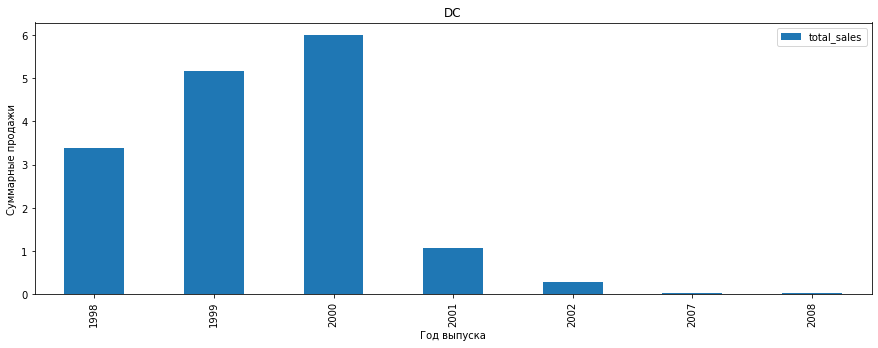

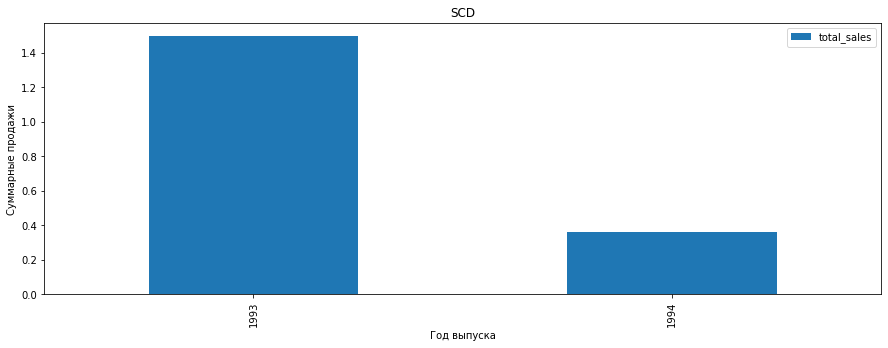

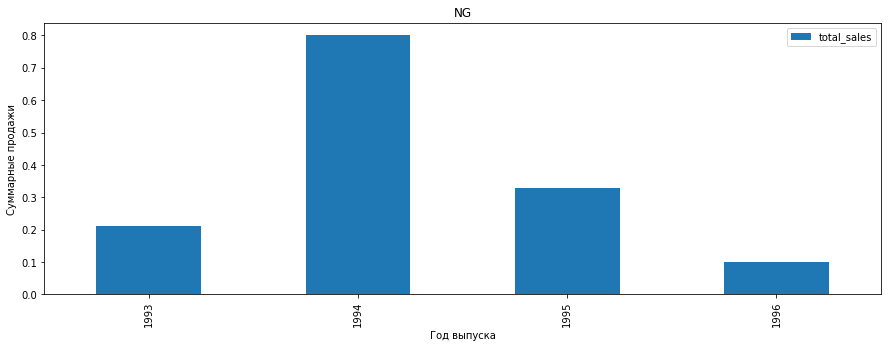

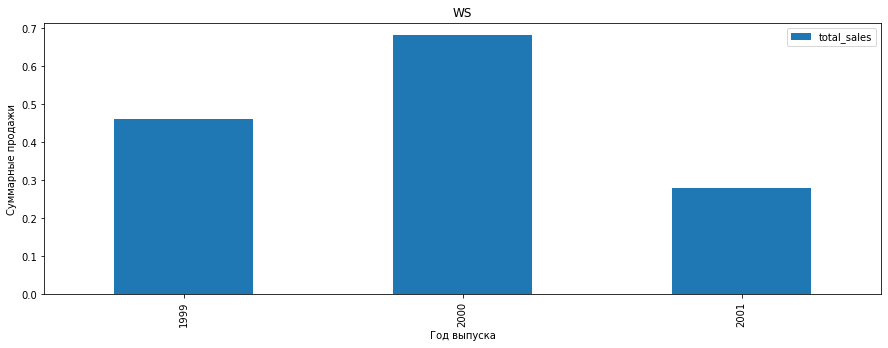

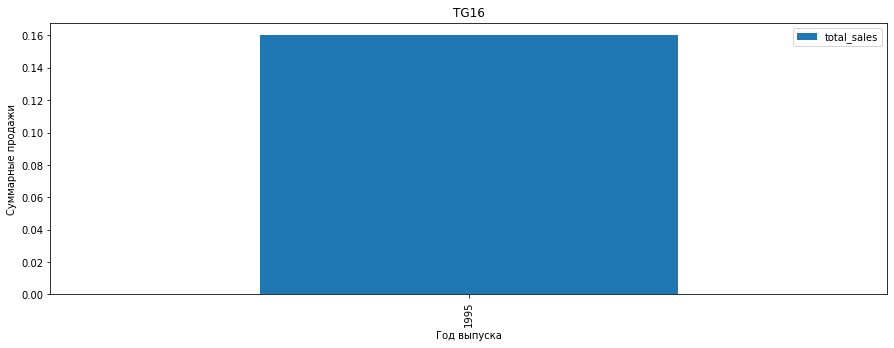

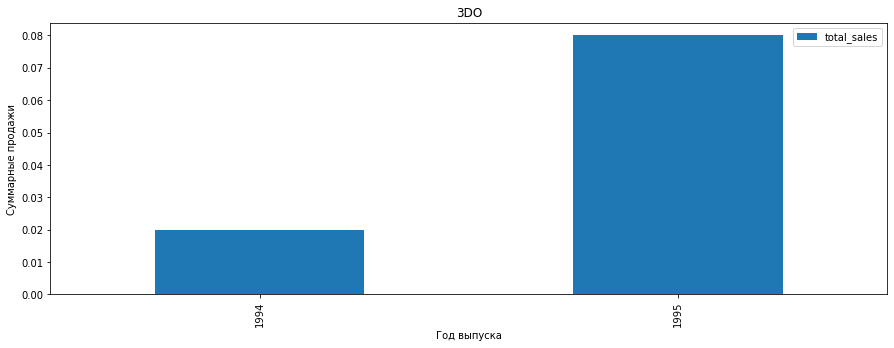

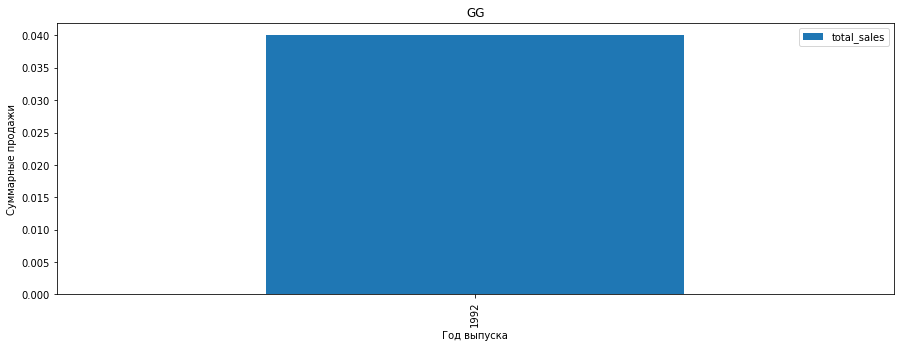

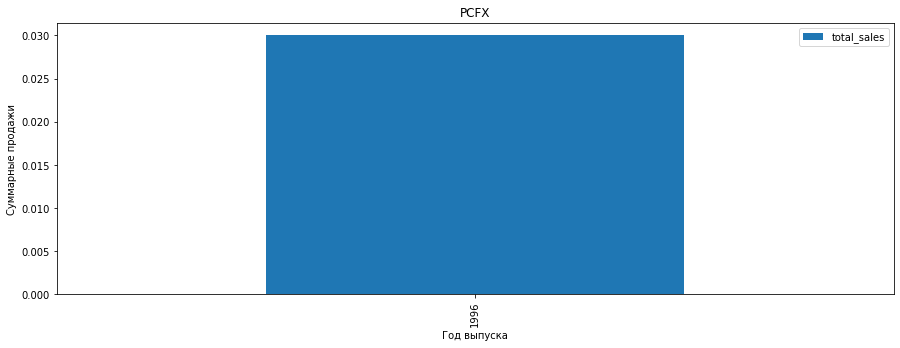

In [352]:
for platform in top_platforms2:
    data[data['platform'] == platform].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')\
    .plot(kind = 'bar', figsize=(15,5))
    plt.title(platform)
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарные продажи')
    plt.show()

Итак, из полученных диаграмм можно сказать, что в среднем срок жизни платформы от 8 до 10 лет. В список платформ, которые продолжают работать в 2016 году входят: PS4, PS3, PC, 3DS, XOne, Wii U, X360, PSV.  



###### Определим актуальный период, за который нужно взять данные для дальнейшего исследования.

Мы можем наблюдать 3 явных этапа количества выпускаемых игр по годам: рост до 2008 года, пик в 2008 и 2009 годах и последующий спад.
Актуальный период для прогноза на 2017 возьмем с 2014 по 2016 года, так как остались только актуальные платформы и за 2016 год данные неполные.

In [353]:
period_data = data.query(' 2014 <= year_of_release <= 2016')
period_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,duplicates
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63,False
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,False
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68,False
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,False
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98,False


###### Посмотрим какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

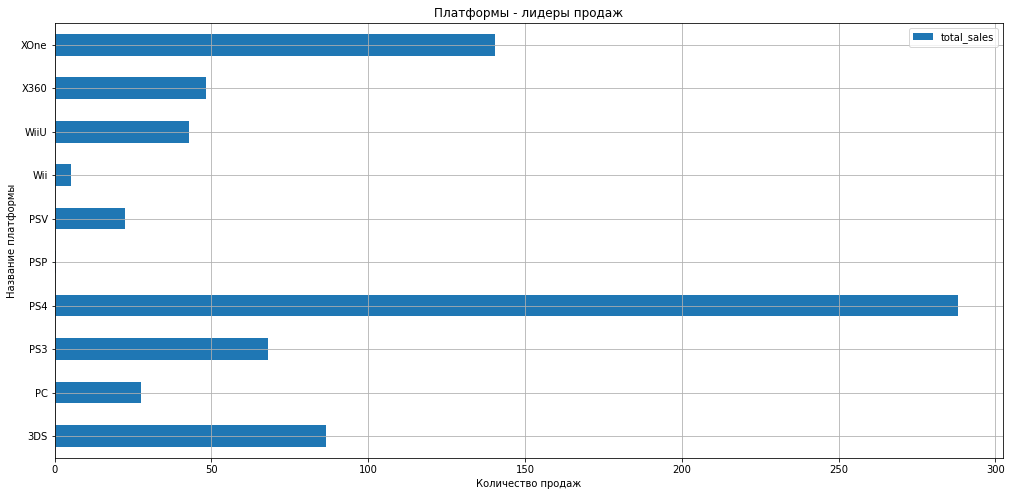

In [354]:
platforms_leader = period_data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')\
.plot(kind='barh', legend=True, grid=True, figsize=(17, 8))
plt.title('Платформы - лидеры продаж')
plt.xlabel('Количество продаж')
plt.ylabel('Название платформы')
plt.show()

Из графика можно сказать, что лидерами по продажам являются XOne и PS4, минимально прибыльные - это PSP и Wii.

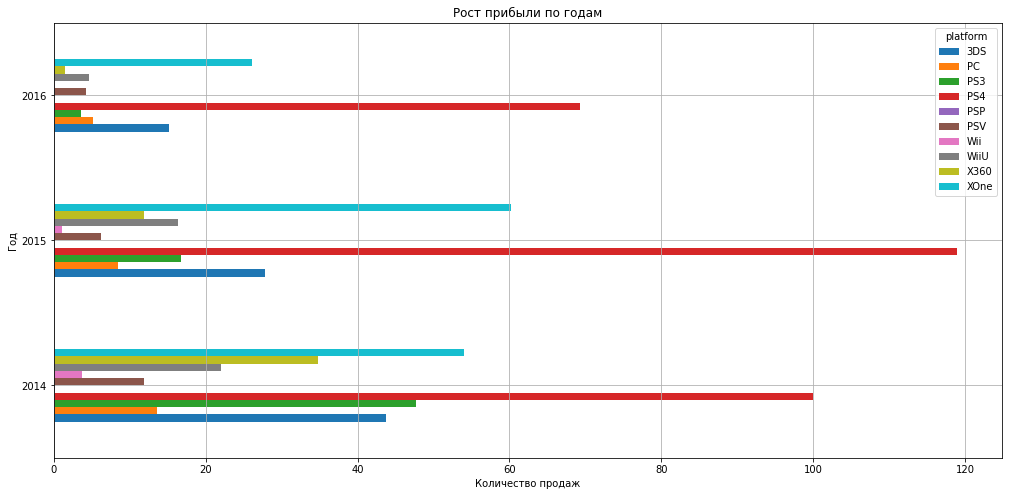

In [355]:
period_data.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')\
.plot(kind='barh', legend=True, grid=True, figsize=(17, 8))
plt.title('Рост прибыли по годам')
plt.xlabel('Количество продаж')
plt.ylabel('Год')
plt.show()

Наибольший рост по прибыли с 2014 по 2016 гг. (не считая того, что за 2016 год неполные данные) имеют PS4, XOne, 3DS, наименьший рост у PSP (вообще нет прибыли) и у Wii.

###### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

In [356]:
period_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,719.000000,889.000000,1690.000000
mean,2014.952663,0.168118,0.160314,0.055083,0.048320,72.325452,6.625647,0.431834
std,0.799724,0.446009,0.466713,0.211455,0.141748,12.215671,1.590143,1.055799
min,2014.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.030000
50%,2015.000000,0.020000,0.020000,0.010000,0.010000,74.000000,7.000000,0.100000
75%,2016.000000,0.120000,0.120000,0.040000,0.040000,81.000000,7.800000,0.350000
max,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.300000,14.630000


In [357]:
emissions = period_data.query('total_sales < 7')

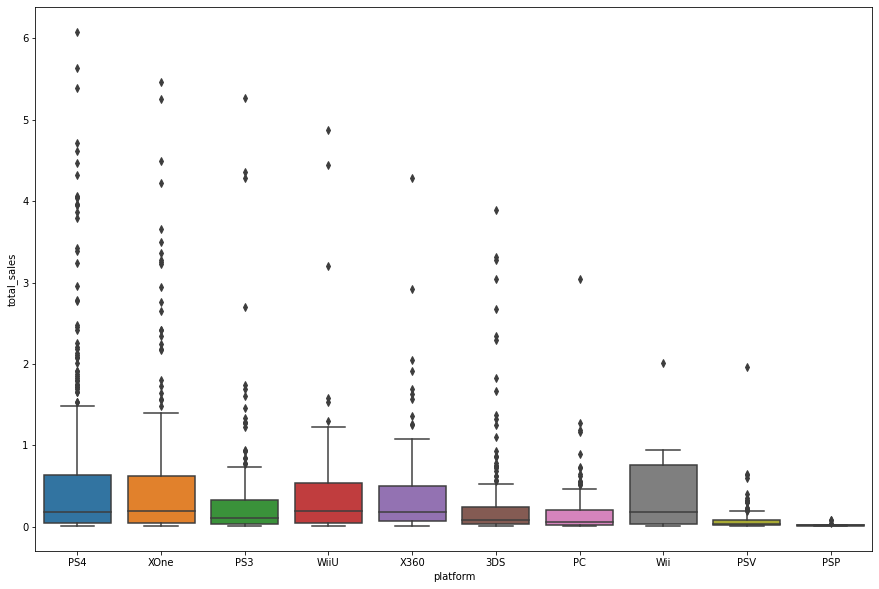

In [358]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=emissions, x='platform', y='total_sales');

На диаграмме размаха можно наблюдать выбросы 3DS, PS4. Медианные значения продаж разных платформ имеют не особо большую разницу, чего не скажешь о среднем значении. Значению PSP вообще отсутвует возможность дать характеристикую


###### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Итак, выберем самую популярную платформу PS4

In [359]:
platform_ps4 = period_data.query('platform == "PS4"')

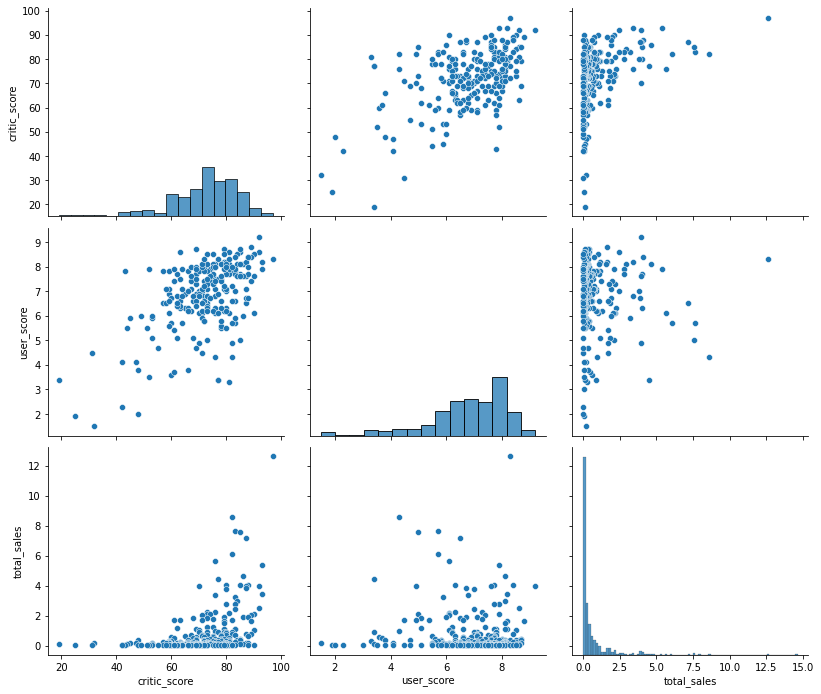

In [360]:
sns.pairplot(platform_ps4[['critic_score', 'user_score', 'total_sales']])
plt.gcf().set_size_inches(12,10);

Глядя на диаграмму, можно сделать вывод, что оценки пользователей и критиков почти совпадают, а сумма продаж не особо зависит от оценки.

###### Найдем коэффициент корреляции.

In [361]:
print(platform_ps4[['critic_score', 'user_score', 'total_sales']].corr()) 

              critic_score  user_score  total_sales
critic_score      1.000000    0.546434     0.402661
user_score        0.546434    1.000000    -0.040132
total_sales       0.402661   -0.040132     1.000000


Посчитаем корреляцию для каждой платформы.

In [362]:
for platform in period_data['platform'].unique():
    platform_data = period_data[period_data['platform'] == platform]
    user_score_corr = platform_data['user_score'].corr(platform_data['total_sales'])
    critic_score_corr = platform_data['critic_score'].corr(platform_data['total_sales'])
    print(f'Platform: {platform}')
    print(f'Корреляция оценки пользователей с суммой подаж: {user_score_corr:.2f}')
    print(f'Корреляция оценки критиков с суммой продаж: {critic_score_corr:.2f}')
    print()

Platform: PS4
Корреляция оценки пользователей с суммой подаж: -0.04
Корреляция оценки критиков с суммой продаж: 0.40

Platform: 3DS
Корреляция оценки пользователей с суммой подаж: 0.22
Корреляция оценки критиков с суммой продаж: 0.31

Platform: XOne
Корреляция оценки пользователей с суммой подаж: -0.07
Корреляция оценки критиков с суммой продаж: 0.43

Platform: WiiU
Корреляция оценки пользователей с суммой подаж: 0.41
Корреляция оценки критиков с суммой продаж: 0.37

Platform: PS3
Корреляция оценки пользователей с суммой подаж: -0.17
Корреляция оценки критиков с суммой продаж: 0.45

Platform: X360
Корреляция оценки пользователей с суммой подаж: -0.14
Корреляция оценки критиков с суммой продаж: 0.53

Platform: PC
Корреляция оценки пользователей с суммой подаж: -0.07
Корреляция оценки критиков с суммой продаж: 0.18

Platform: Wii
Корреляция оценки пользователей с суммой подаж: 1.00
Корреляция оценки критиков с суммой продаж: nan

Platform: PSV
Корреляция оценки пользователей с суммой под

Здесь стоит отметить корреляцию Platform: Wii, оценка пользователей напрямую зависит от суммы продаж, чего не скажешь о других платформах.

###### Посмотрим на общее распределение игр по жанрам

In [363]:
genre_sales = period_data.groupby('genre')['total_sales'].sum().to_frame().\
sort_values('total_sales', ascending=False).reset_index()
genre_sales.head(15)

,genre,total_sales
0,Action,199.71
1,Shooter,170.94
2,Sports,109.48
3,Role-Playing,101.44
4,Misc,37.55
5,Fighting,28.22
6,Racing,27.52
7,Platform,18.09
8,Adventure,17.55
9,Simulation,13.13


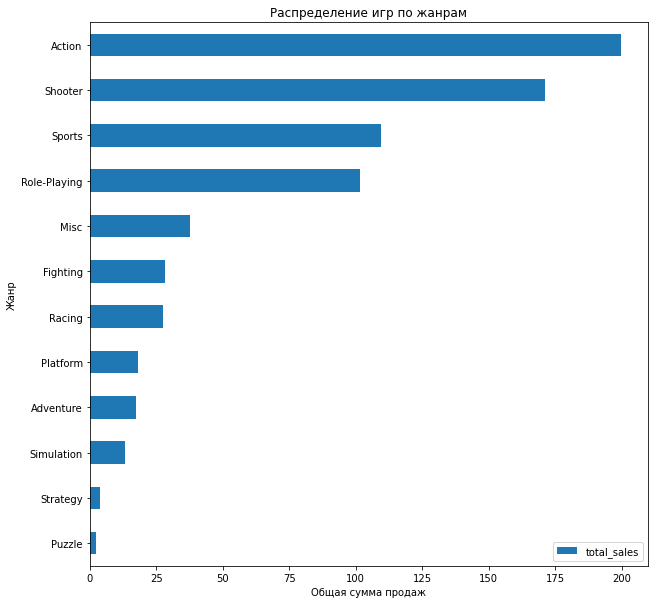

In [364]:
fraction = genre_sales.pivot_table(index='genre', values='total_sales', aggfunc='sum')\
    .sort_values(ascending=True, by='total_sales')
fraction.plot(kind='barh', figsize=(10, 10), y='total_sales')
plt.title('Распределение игр по жанрам')
plt.xlabel('Общая сумма продаж')
plt.ylabel('Жанр')
plt.show()

Наиболее популярны жанры: Action, Shooter, Sports, Role-Playing, наименее популярны жанры Puzzle и Strategy.

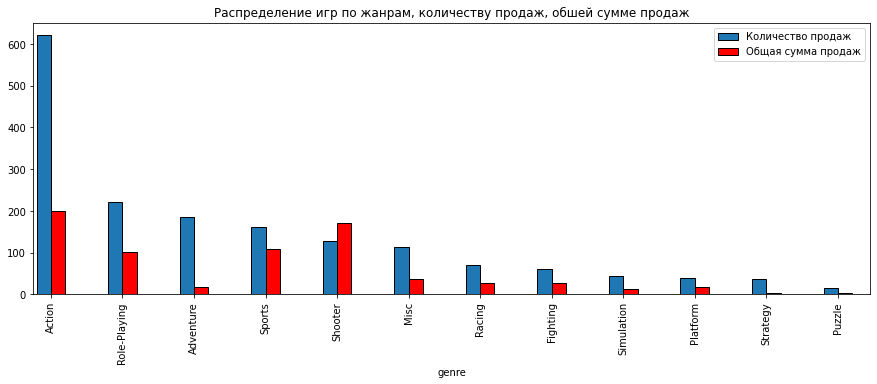

In [365]:
ax = plt.gca()

pivot = period_data.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).sort_values(by='name', ascending=False)

plot1 = pivot['name']
plot1.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, position=1)

plot2 = pivot['total_sales']
plot2.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='red', position=0)

ax.legend(['Количество продаж', 'Общая сумма продаж'])
plt.title('Распределение игр по жанрам, количеству продаж, обшей сумме продаж');

In [366]:
ratio_genres = period_data.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).sort_values(by='name', ascending=False)

In [367]:
ratio_genres['ratio'] = ratio_genres['total_sales'] / ratio_genres['name']
ratio_genres.sort_values(by='ratio', ascending=False)

,name,total_sales,ratio
genre,,,
Shooter,128,170.94,1.335469
Sports,161,109.48,0.680000
Platform,38,18.09,0.476053
Fighting,60,28.22,0.470333
Role-Playing,221,101.44,0.459005
Racing,69,27.52,0.398841
Misc,113,37.55,0.332301
Action,620,199.71,0.322113
Simulation,44,13.13,0.298409


Из графика количества продаж и сумм продаж по жанрам можно заметить, что хотя количество продаж у Action выше, но сумма продаж ниже, чем у платформы Shooter.

C 1980 по 1990 год навблюдается наименьшее количество выпущенных игр, поэтому все данные за все периоды не важны. С 1991 года начинается рост, пиковые значения приходятся на 2008 - 2009 годы, далее начинается спад по количеству игр. Самыми популярными игровыми платформами за весь период оказались PS2, X360, PS3, Wii, DS, PS. Из графика распределения сумм продаж по годам для каждой платформы, выяснилось, что в среднем срок жизни платформы от 8 до 10 лет. В список платформ, которые продолжают работать в 2016 году входят: PS4, PS3, PC, 3DS, XOne, Wii U, X360, PSV. В дальнейшем анализе использовался актуальный период с 2014 по 2016, выбран данный период по причине того, что к этому времени остались только актуальные платформы, продолжающие свою работу. Лидерами по продажам за весь период 2014-2016 гг. являются XOne и PS4, минимально прибыльные - это PSP и Wii. Наибольший рост по прибыли с 2014 по 2016 гг. (не считая того, что за 2016 год неполные данные) имеют PS4, XOne, 3DS, наименьший рост у PSP (вообще нет прибыли) и у Wii.

Далее построена диаграмма размаха, где можно наблюдать выбросы 3DS, PS4. Медианные значения продаж разных платформ имеют не особо большую разницу, чего не скажешь о среднем значении. Значению PSP отсутвует возможность дать характеристикую.

Для построения диаграммы рассеяния и расчета корреляции между отзывами и продажами за основу взята самая популярная платформа PS4. Выяснилось, что что оценки пользователей и критиков почти совпадают, а сумма продаж не особо зависит от оценки.

В посчитанном коэффициенте корреляции  между отзывами и продажами для всех платформ выделилась платформа Wii,гдже оценка пользователей напрямую зависит от суммы продаж. При распределении игр по жанрам можно наблюдать наиболее популярны жанры: Action, Shooter, Sports, Role-Playing, наименее популярны жанры Puzzle и Strategy. Из графика количества продаж и сумм продаж по жанрам можно заметить, что хотя количество продаж у Action выше, но сумма продаж ниже, чем у платформы Shooter

## Составим портрет пользователя каждого региона (NA, EU, JP):

Самые популярные платформы (топ-5), опишем различия в долях продаж.

Самые популярные жанры (топ-5), поясним разницу.

Определим влияет ли рейтинг ESRB на продажи в отдельном регионе.

###### Продажи в Северной Америке (миллионы проданных копий)

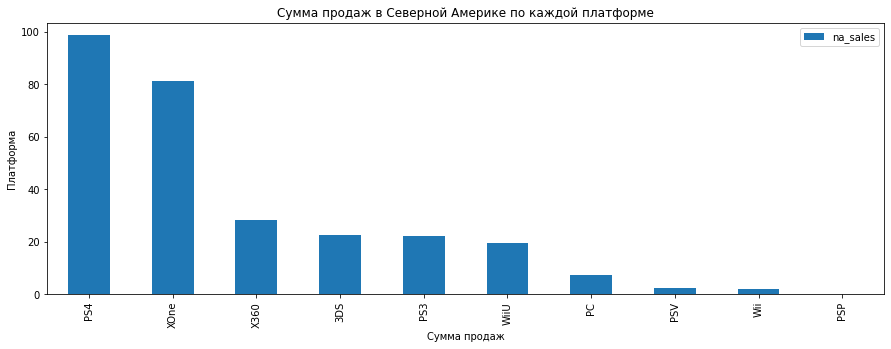

In [368]:
na_sales_research = period_data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')\
.sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(15,5))
plt.title('Сумма продаж в Северной Америке по каждой платформе')
plt.xlabel('Сумма продаж')
plt.ylabel('Платформа')
plt.show()

Пользователи Северной Америки больше всего предпочитают PS4 (Японская приставка), также пользуются платформы XOne (США), X360 (США), 3DS (Япония), PS3 (Япония), в сумме продаж преобладают игры на японских консолях.

###### Продажи в Европе (миллионы проданных копий)

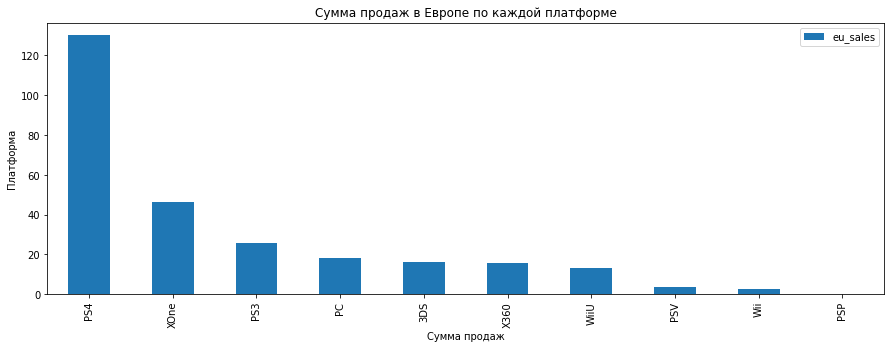

In [369]:
eu_sales_research = period_data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')\
.sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5))
plt.title('Сумма продаж в Европе по каждой платформе')
plt.xlabel('Сумма продаж')
plt.ylabel('Платформа')
plt.show()


Пользователи Европы также как и жители Северной Америки больше всего предпочитают PS4 (Японская приставка), также пользуются платформы XOne (США), PS3 (Япония), X360 (США), PC (Япония), 3DS (Япония), в сумме продаж также преобладают игры на японских консолях.

###### Продажи в Японии (миллионы проданных копий)

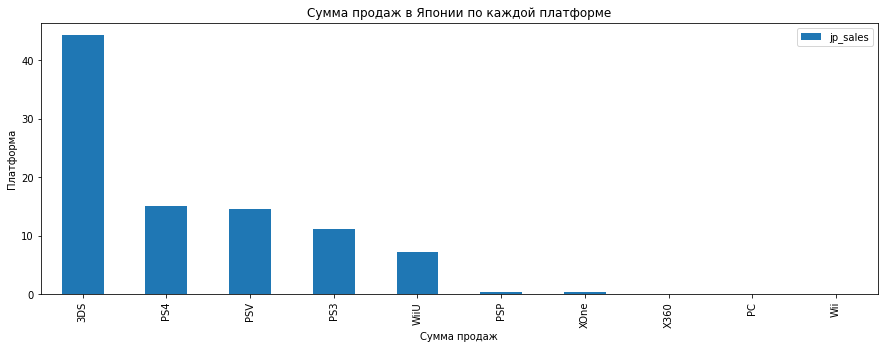

In [370]:
jp_sales_research = period_data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')\
.sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(15,5))
plt.title('Сумма продаж в Японии по каждой платформе')
plt.xlabel('Сумма продаж')
plt.ylabel('Платформа')
plt.show()

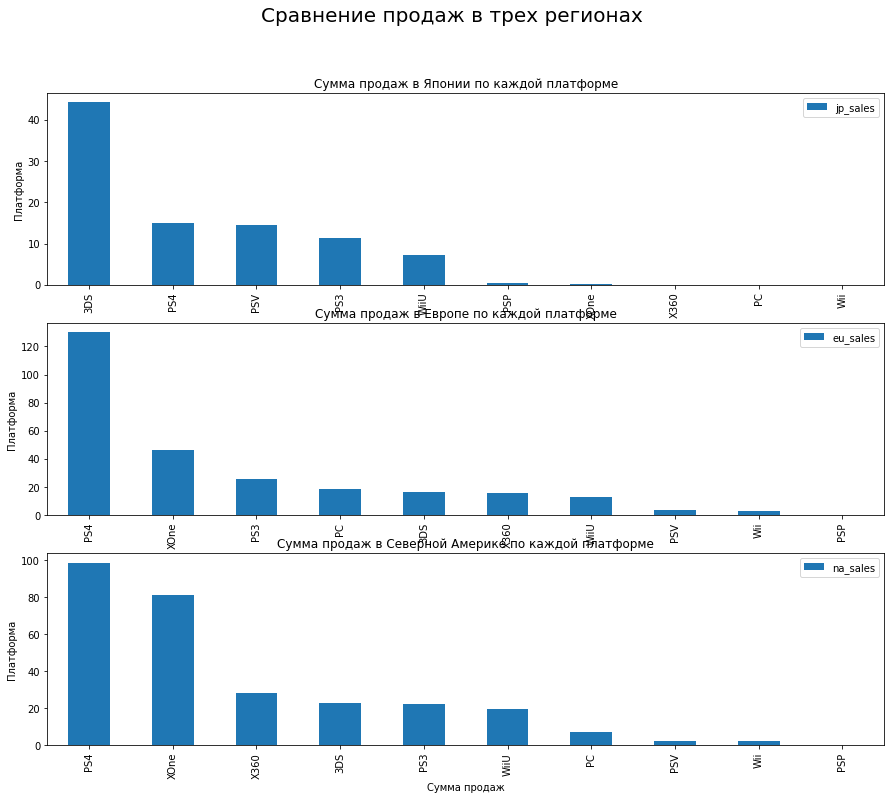

In [371]:
fig, ax = plt.subplots(3, 1, figsize=(15, 12))

jp_sales_research = period_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
.sort_values(ascending=False, by='jp_sales').plot(kind='bar', ax=ax[0])
ax[0].set_title('Сумма продаж в Японии по каждой платформе')
ax[0].set_xlabel('Сумма продаж')
ax[0].set_ylabel('Платформа')


eu_sales_research = period_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
.sort_values(ascending=False, by='eu_sales').plot(kind='bar', ax=ax[1])
ax[1].set_title('Сумма продаж в Европе по каждой платформе')
ax[1].set_xlabel('Сумма продаж')
ax[1].set_ylabel('Платформа')


na_sales_research = period_data.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
.sort_values(ascending=False, by='na_sales').plot(kind='bar', ax=ax[2])
ax[2].set_title('Сумма продаж в Северной Америке по каждой платформе')
ax[2].set_xlabel('Сумма продаж')
ax[2].set_ylabel('Платформа')

fig.suptitle('Сравнение продаж в трех регионах', fontsize=20)
plt.show()



Предпочтения пользователей Японии отличаются от пользователей Северной Америки, Европы, больше всего предпочитают 3DS (Япония),  PS4 (Япония), PSV(Япония), PS3 (Япония), WiiU (Япония), вывод: японцы покупают в основном консоли собственного производства.

In [372]:
period_data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales')

,na_sales
genre,
Shooter,79.02
Action,72.59
Sports,46.13
Role-Playing,33.47
Misc,15.05
Fighting,12.43
Racing,8.74
Platform,6.79
Adventure,5.64


Наиболее популярные жанры в Северной Америке - это Shooter (79.02), Action (72.59), Sports (46.13), Role-Playing (33.47) и Misc (15.05). Наименее популярен жанр Puzzle (0.65)

In [373]:
period_data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales')

,eu_sales
genre,
Action,74.93
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13
Misc,12.86
Simulation,7.30
Platform,6.80
Fighting,6.69


Наиболее популярные жанры в продажи в Европе - Action (74.93), Shooter (65.52), Sports (45.73), Role-Playing (28.17) и Misc (12.86). Наименее популярен жанр также как и в Северной Америке Puzzle (0.52).


In [374]:
period_data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales')

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87
Adventure,3.60
Sports,3.26
Platform,2.69
Simulation,2.31


Наиболее популярные жанры в продажи в Японии - Role-Playing (31.16), Action (29.58), Fighting (6.37), Misc (5.61) и Shooter (4.87). Самым непопулярным жанром является Puzzle (0.93).

В целом можно сказать, что лидером продаж является Северная Америка, в Северной Америке и Европе только 2 вида платформ из 5 Американские, в Японии востребованы только собственные платформы. Востребованные жанры в Северной Америке и Европе пактически индентичны. И самым непопулярным жанром среди всех исследуемых пользователей является Puzzle.

In [375]:
ESRB = period_data.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')
ESRB.head(10)

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.69,8.01,96.48
T,34.07,14.78,38.95
no_rating,58.95,56.90,64.72


Вспомним категории рейтинга:
«E» («Everyone») — «Для всех»

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«M» («Mature») — «Для взрослых»

«T» («Teen») — «Подросткам»

«no_rating» — рейтинг отсутствует

In [379]:
uncertain_rating.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,duplicates
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63,False
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68,False
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98,False
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,no_rating,7.55,False
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,no_rating,7.39,False


In [380]:
ESRB2 = uncertain_rating.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')
ESRB2.head(10)

,eu_sales,jp_sales,na_sales
rating,,,
no_rating,58.95,56.9,64.72


Игры с рейтингом М влияют на продажи в Европе и Северной Америке, в Японии игры без рейтинга по общей сумме продаж превышают общую сумму по всем категориям рейтинга.

## Проверим гипотезы:

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2) Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для проверки гипотез будем использовать специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind(array1, array2, equal_var, alternative). 

Выборки по для двух гипотез независимы.

###### Гипотеза 1. 

Нулевая гипотеза (Н0): средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза (Н1):средний пользовательский рейтинг платформы Xbox One больше чем средний пользовательский рейтинг платформы PC.

Пороговое значение alpha = 0.05

In [381]:
user_score_XOne = period_data[period_data['platform']=="XOne"]['user_score'].dropna()
user_score_PC = period_data[period_data['platform']=="PC"]['user_score'].dropna()

In [390]:
alpha = 0.05 

results = st.ttest_ind(user_score_XOne, user_score_PC, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.0634512126018074
Нет оснований отвергнуть нулевую гипотезу


Нулевая гипотеза (Н0) подтвердилась, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

###### Гипотеза 2. 

Нулевая гипотеза (Н0): Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.

Пороговое значение alpha = 0.05

In [388]:
user_score_action = period_data[period_data['genre']=="Action"]['user_score'].dropna()
user_score_sports = period_data[period_data['genre']=="Sports"]['user_score'].dropna()

In [389]:
alpha = 0.05 

results = st.ttest_ind(user_score_action, user_score_sports, alternative='')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 2.1177739029231719e-19
Отвергаем нулевую гипотезу


Нулевая гипотеза (Н0) не подтвердилась, средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны.

# Вывод

Итак, проведен исследовательский анализ исторических данных о продажах игр, оценок пользователей и экспертов, жанров и платформ, цель которого выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Изучена информация в датафрейме datasets/games.csv. Из полученных данных можно сделать вывод, что названия столбцов не приведены к нижнему регистру. Также обнаружено, что в столбцах: year_of_release и user_score тип данных приведен не в соответствии с правилами.

В ходе подготовки данных к исследования в данных обнаружено значение TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Данное значение заменено во всей таблице значения на nan.
Заменен тип данных в столбцах: year_of_release (float yf int64),так как год не может быть дробным числом, и user_score (object на float), так как оценка должна быть дробным числом аналогично как и в столбце critic_score.
Обнаружено наличие пропусков в следующих столбцах: name (имя), year_of_release (год выпуска), critic_score (оценка критиков), user_score (оценка пользователей), rating (рейтинг от организации ESRB). Заполнять попуски в critic_score, user_score и rating будет некорректно, так как в дальнейшем исследовании мы можем получить неточные результаты. Американская компания ESRB основана в 1994 г, поэтому скорее всего столбец rating имеет пропуски до 1994 года. Отсутсвие значений в столбцах critic_score и user_score скорее всего связано с тем, что оценка игры просто отсутствует. Также данные за 2016 год представлены не в полном объеме, так как год еще не закончился.

При проведении исследовательского анализа выяснилось, что  1980 по 1990 год навблюдается наименьшее количество выпущенных игр, поэтому в дальнейшем исследовании мы их не используем. С 1991 года начинается рост, пиковые значения приходятся на 2008 - 2009 годы, далее начинается спад по количеству игр.
Самыми популярными игровыми платформами за весь период являются PS2, X360, PS3, Wii, DS, PS. В среднем срок жизни платформы от 8 до 10 лет. В список платформ, которые продолжают работать в 2016 году входят: PS4, PS3, PC, 3DS, XOne, Wii U, X360, PSV.
При определении актуального периода, за который нужно взять данные для дальнейшего исследования, решено использовать период с 2014 по 2016 года, так как остались только актуальные платформы и за 2016 год данные неполные.
Лидерами по продажам являются XOne и PS4, минимально прибыльные - это PSP и Wii.
Наибольший рост по прибыли с 2014 по 2016 гг. (не считая того, что за 2016 год неполные данные) имеют PS4, XOne, 3DS, наименьший рост у PSP (вообще нет прибыли) и у Wii.
На построенной дмаграмме размаха можно наблюдать то, что медианные значения продаж разных платформ имеют не особо большую разницу, чего не скажешь о среднем значении. Значению PSP вообще отсутвует возможность дать характеристикую.
Для построения диаграммы рассеяния и расчета корреляции между отзывами и продажами за основу взята самая популярная платформа PS4. Выяснилось, что что оценки пользователей и критиков почти совпадают, а сумма продаж не особо зависит от оценки.

В посчитанном коэффициенте корреляции  между отзывами и продажами для всех платформ выделилась платформа Wii,гдже оценка пользователей напрямую зависит от суммы продаж. При распределении игр по жанрам можно наблюдать наиболее популярны жанры: Action, Shooter, Sports, Role-Playing, наименее популярны жанры Puzzle и Strategy. Из графика количества продаж и сумм продаж по жанрам можно заметить, что хотя количество продаж у Action выше, но сумма продаж ниже, чем у платформы Shooter.

Составлен портрет пользователя каждого региона (NA, EU, JP), по которому можно сказать, что пользователи Северной Америки больше всего предпочитают PS4 (Японская приставка), также пользуются платформы XOne (США), X360 (США), 3DS (Япония), PS3 (Япония), в сумме продаж преобладают игры на японских консолях.
Пользователи Европы также как и жители Северной Америки больше всего предпочитают PS4 (Японская приставка), также пользуются платформы XOne (США), PS3 (Япония), X360 (США), PC (Япония), 3DS (Япония), в сумме продаж также преобладают игры на японских консолях.
Предпочтения пользователей Японии отличаются от пользователей Северной Америки, Европы, больше всего предпочитают 3DS (Япония), PS4 (Япония), PSV(Япония), PS3 (Япония), WiiU (Япония), вывод: японцы покупают в основном консоли собственного производства.
Наиболее популярные жанры в продажи в Европе - Action (74.93), Shooter (65.52), Sports (45.73), Role-Playing (28.17) и Misc (12.86). Наименее популярен жанр также как и в Северной Америке Puzzle (0.52).
Наиболее популярные жанры в продажи в Японии - Role-Playing (31.16), Action (29.58), Fighting (6.37), Misc (5.61) и Shooter (4.87). Самым непопулярным жанром является Puzzle (0.93).

В целом можно сказать, что лидером продаж является Северная Америка, в Северной Америке и Европе только 2 вида платформ из 5 Американские, в Японии востребованы только собственные платформы. Востребованные жанры в Северной Америке и Европе пактически индентичны. И самым непопулярным жанром среди всех исследуемых пользователей является Puzzle.

Игры с рейтингом М влияют на продажи в Европе и Северной Америке, в Японии игры без рейтинга по общей сумме продаж превышают общую сумму по всем категориям рейтинга.
Проверены две гипотезы:

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2) Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для проверки гипотез будем использовать специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind(array1, array2, equal_var, alternative), где выборки для двух гипотез независимы.
Для гипотезы 1 Нулевая гипотеза (Н0) подтвердилась, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Гепотеза 2 не подтвердилась, средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны.